In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
import fit_arima
import open_data

In [3]:
df = open_data.open()

In [4]:
stazione = 'S. LAZZARO'

In [5]:
ritorno = fit_arima.compute(stazione, 2, 1)

20:54:17 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

20:54:53 - cmdstanpy - INFO - CmdStan done processing.
20:54:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARIMA_p1q_STAN/code.stan', line 80, column 2 to column 25)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARIMA_p1q_STAN/code.stan', line 80, column 2 to column 25)
Consider re-running with show_console=True if the above output is unclear!


In [6]:
az.summary(ritorno['inference_data'], var_names=['phi','theta','sigma','y_start'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
phi[0],0.702,0.055,0.597,0.803,0.001,0.001,5080.0,3551.0,1.0
phi[1],-0.147,0.053,-0.239,-0.041,0.001,0.001,5208.0,3439.0,1.0
theta[0],-0.952,0.019,-0.982,-0.916,0.000,0.000,6360.0,3762.0,1.0
sigma,0.152,0.006,0.142,0.163,0.000,0.000,7665.0,3765.0,1.0
y_start[0],0.889,0.961,-0.972,2.576,0.012,0.011,6803.0,4071.0,1.0
y_start[1],1.740,0.477,0.800,2.593,0.008,0.006,3750.0,3441.0,1.0
y_start[2],1.775,0.279,1.274,2.322,0.004,0.003,4016.0,3351.0,1.0


array([[<AxesSubplot: title={'center': 'phi'}>,
        <AxesSubplot: title={'center': 'phi'}>],
       [<AxesSubplot: title={'center': 'theta'}>,
        <AxesSubplot: title={'center': 'theta'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>]], dtype=object)

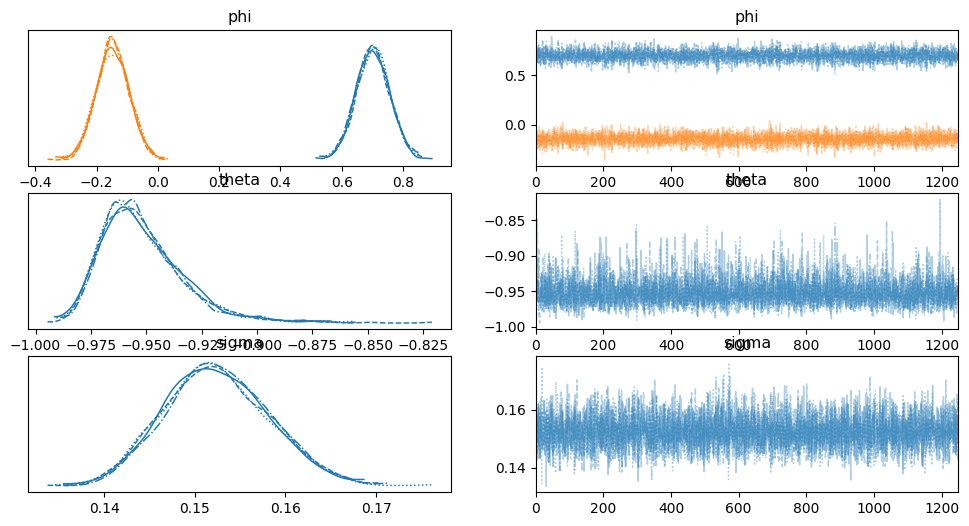

In [7]:
az.plot_trace(ritorno['inference_data'], var_names=['phi','theta','sigma'])

array([<AxesSubplot: title={'center': 'phi\n0'}>,
       <AxesSubplot: title={'center': 'phi\n1'}>,
       <AxesSubplot: title={'center': 'theta\n0'}>,
       <AxesSubplot: title={'center': 'sigma'}>], dtype=object)

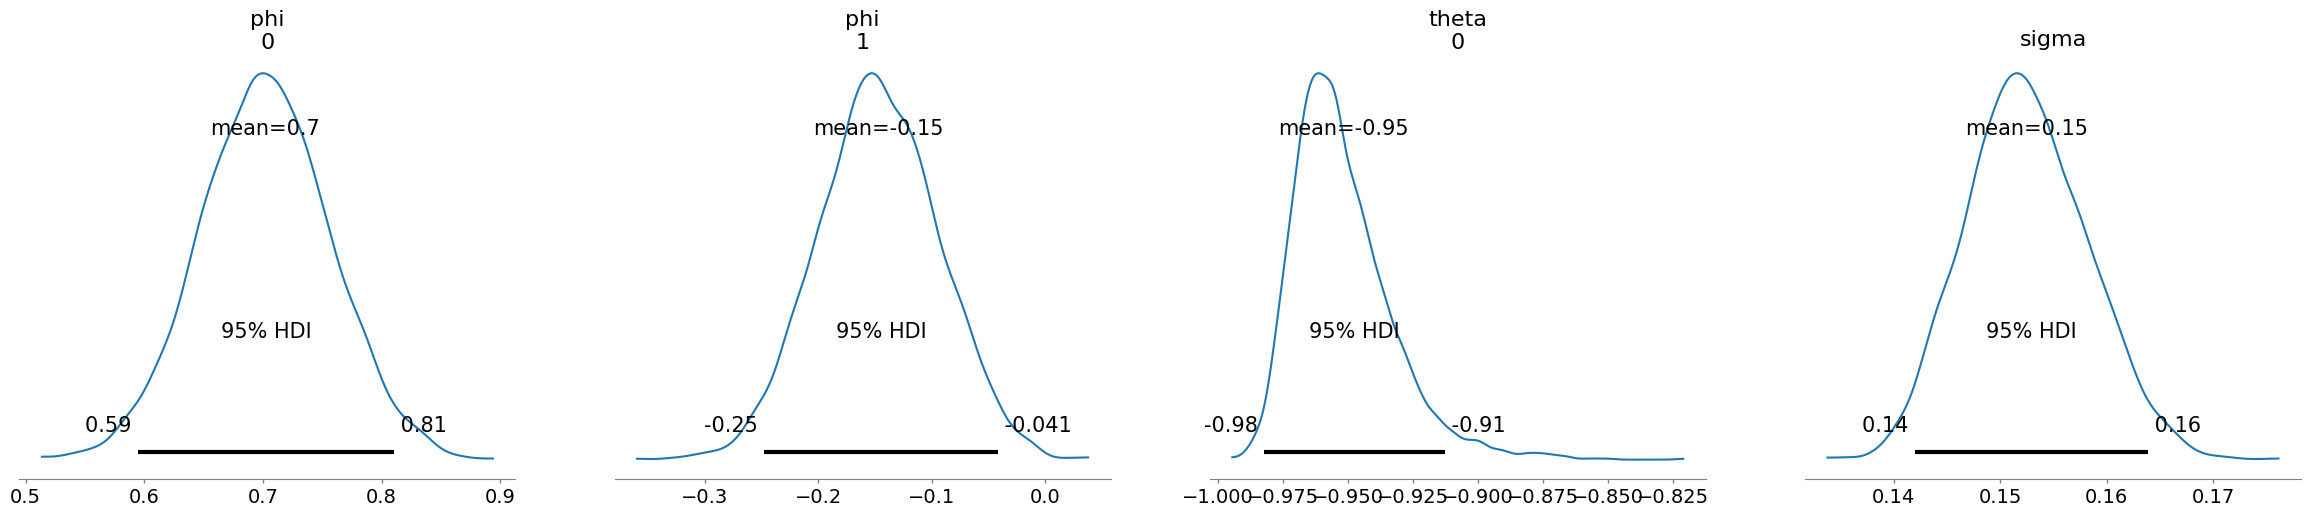

In [8]:
az.plot_posterior(ritorno['inference_data'], var_names=['phi','theta','sigma'], hdi_prob=0.95)

array([[<AxesSubplot: title={'center': '2018-02-14'}>,
        <AxesSubplot: title={'center': '2018-05-02'}>,
        <AxesSubplot: title={'center': '2018-09-19'}>],
       [<AxesSubplot: title={'center': '2018-10-17'}>,
        <AxesSubplot: title={'center': '2018-10-18'}>,
        <AxesSubplot: title={'center': '2018-12-31'}>]], dtype=object)

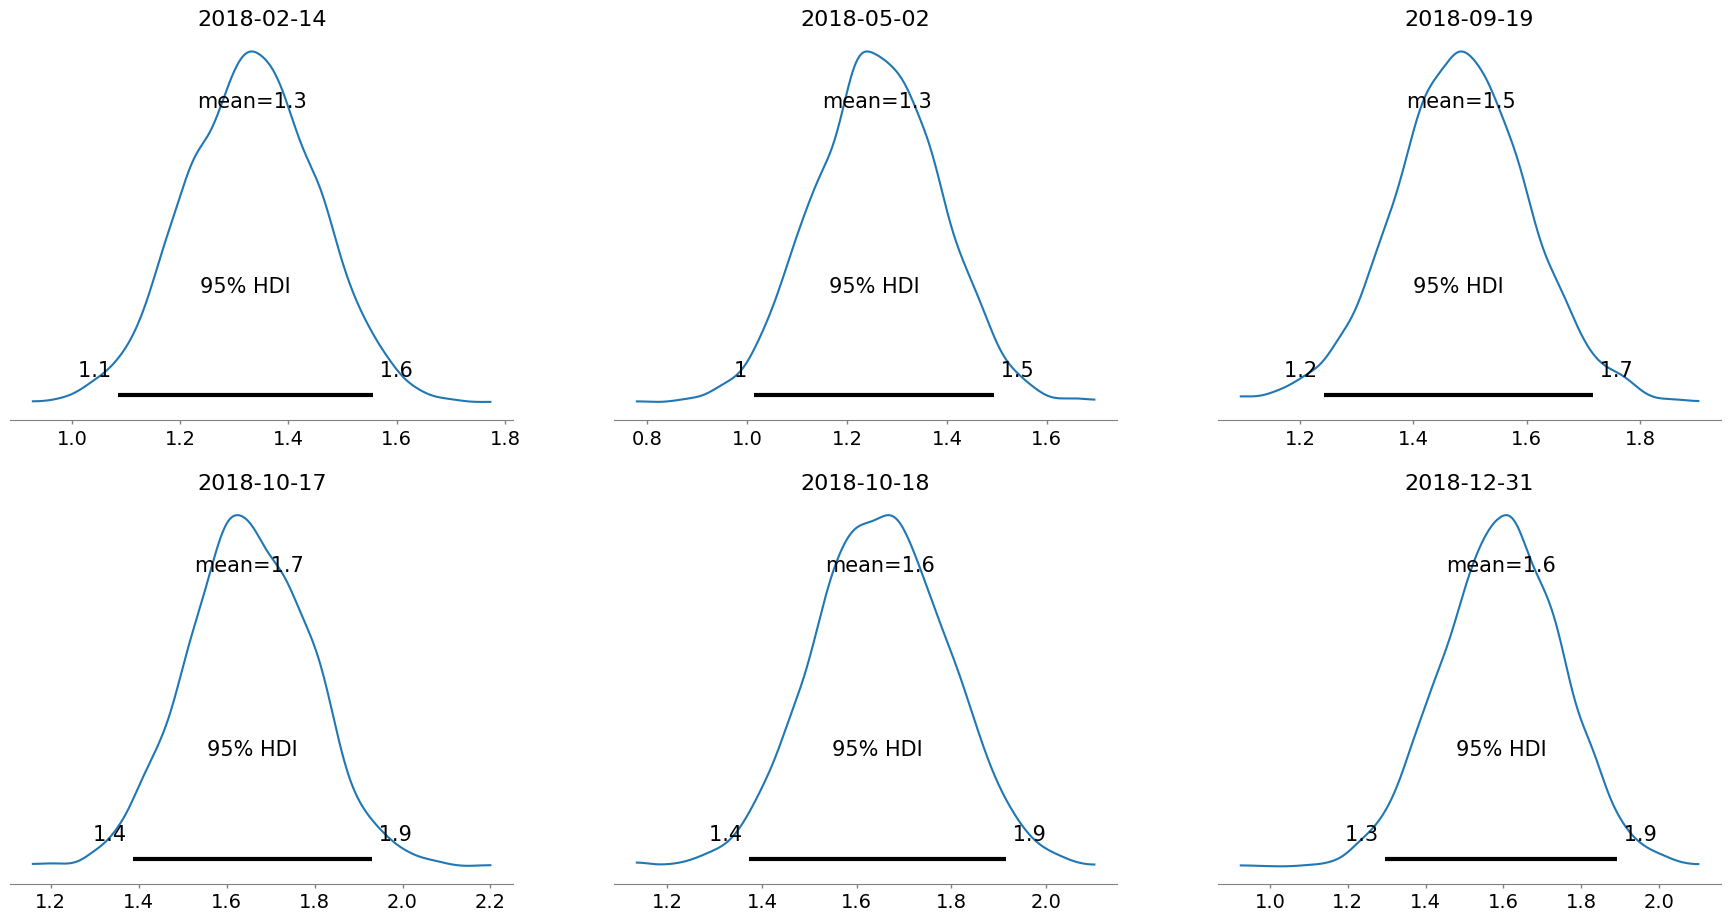

In [9]:
az.plot_posterior(ritorno['reconstructed_y'], hdi_prob=0.95)

<AxesSubplot: xlabel='Date', ylabel='S. LAZZARO'>

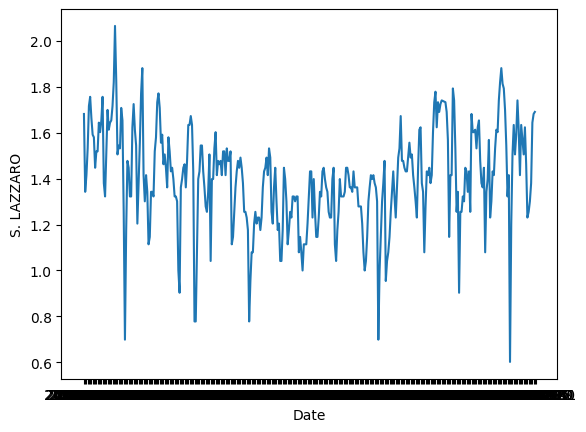

In [10]:
sns.lineplot(df[stazione])

In [11]:
y_post_predictive = np.reshape(ritorno['inference_data'].posterior.y_post_pred.values, (-1,365))

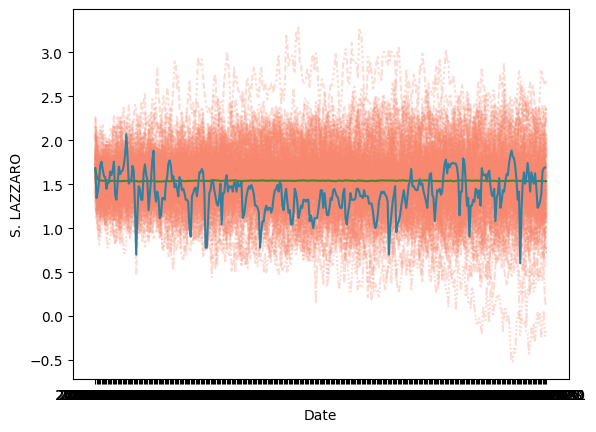

In [12]:
col_map = sns.light_palette((20,90,65), input='husl', as_cmap=True)
ax = plt.subplot(1,1,1)


sns.lineplot(np.transpose(y_post_predictive[0::50,:]))

sns.lineplot(np.mean(y_post_predictive, axis=0))

sns.lineplot(df[stazione])    

ax.get_legend().remove()
col_vals = np.linspace(1,255,num=len(df.columns))
index = 0
for line in ax.get_lines():
    if(index == len(ax.get_lines()) - 1):
        col_map = sns.dark_palette((230,90,65), input='husl', as_cmap=True)
        line.set_c(col_map(175))
        continue
    if(index == len(ax.get_lines()) - 2):
        col_map = sns.dark_palette((120,90,65), input='husl', as_cmap=True)
        line.set_c(col_map(175))
        index += 1
        continue

    #line.set_c(col_map(int(np.round(col_vals[index]))))
    line.set_c(col_map(220))
    line.set_alpha(0.3)
    index += 1


plt.show()